In [1]:
import patchworklib as pw 
import time
t0 = time.time() 
quick=True

<Figure size 72x72 with 0 Axes>

## Patchworklib: patchwork for matplotlib
The patchworklib module provides the Brick class that is the subclass of matplotlib.axes.Axes.  
Each subclass object can be joined with other Brick class objects by using "|" or "/" operands.  
When creating a Brick class object, 'figsize' and 'label' property should be specified, and the 'label' value should be unique among the Brick class objects generated in a script.  
The 'figsize' of an object of the Brick class is not a fixed value. It may be changed in the process of aligning multiple graphs on a tidy layout.   
However, the aspect ratio of each Brick is basically preserved in the process.

For details, see the following example.

### 1. Arranging and stacking multiple axes objects with different aspect ratios

In [2]:
ax1 = pw.Brick("ax1",(1,1))
ax2 = pw.Brick("ax2",(1,3)) 
ax1.set_title("ax1")
ax2.set_title("ax2") 

Text(0.5, 1.0, 'ax2')

CPU times: user 160 ms, sys: 77.5 ms, total: 237 ms
Wall time: 84 ms


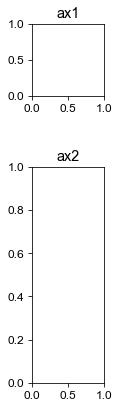

In [3]:
%%time
#arrange two Brick class objects with the vertical direction.
ax12 = ax1 / ax2
ax12.savefig(fname=None, bbox_inches="tight", quick=quick)

In the above case, the widths of 'ax1' and ax2' are same. Therefore, their figure size has not been changed.

CPU times: user 217 ms, sys: 98.7 ms, total: 316 ms
Wall time: 117 ms


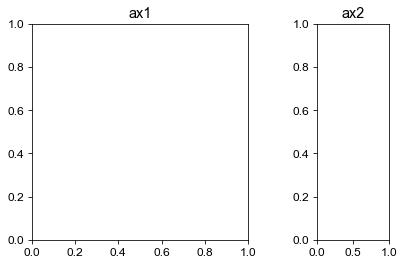

In [4]:
%%time
#arrange two Brick class objects with the vertical direction.
ax12 = ax1 | ax2
ax12.savefig(fname=None, quick=quick) #If 'fname' is Noen, it just return a figure object.  

In this case, the original height of 'ax2' is larger than ax1. Therefore, the size of 'ax1' has been automatically expanded to match ax2. 

The joined 'ax1' and 'ax2' is returned as Bricks class objects that holds multiple Brick class objects.  
Bricks class objects can also be joined with other Brick and Bricks class objects as follows.

CPU times: user 134 ms, sys: 4.76 ms, total: 139 ms
Wall time: 136 ms


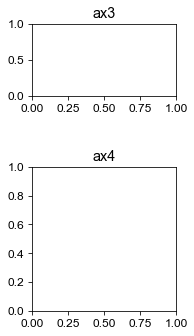

In [5]:
%%time
ax3 = pw.Brick("ax3",(2,1))
ax4 = pw.Brick("ax4",(2,2))
ax3.set_title("ax3")
ax4.set_title("ax4") 
ax34 = ax3/ax4
ax34.savefig(fname=None, quick=quick)

CPU times: user 297 ms, sys: 2.4 ms, total: 299 ms
Wall time: 299 ms


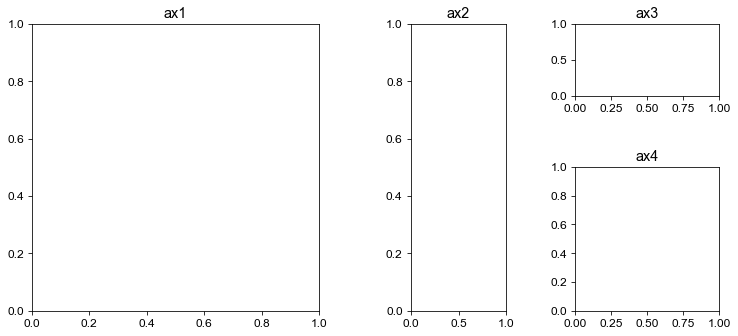

In [6]:
%%time
ax1234 = ax12 | ax34
ax1234.savefig(fname=None, quick=quick)

In [7]:
pw.clear()

### 2. Placing multiple seaborn plots with tidy layout
Seaborn provides functions for drawing attractive statistical graphics. However, they do not provide the function to arrange the multiple graphs generated using seaborn.
By using patchworklib, you can easily arrange seaborn plots the way you want.

In [8]:
import seaborn as sns
import numpy  as np
import pandas as pd

CPU times: user 1.08 s, sys: 8.11 ms, total: 1.08 s
Wall time: 1.08 s


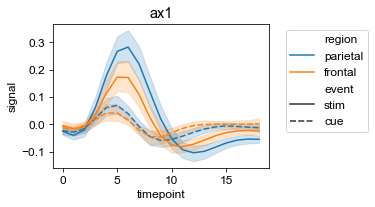

In [9]:
%%time
fmri = sns.load_dataset("fmri")
ax1 = pw.Brick("ax1", figsize=(3,2))
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri, ax=ax1)
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.set_title("ax1")
ax1.savefig(quick=quick) 

CPU times: user 271 ms, sys: 67.7 ms, total: 339 ms
Wall time: 212 ms


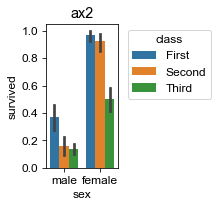

In [10]:
%%time
titanic = sns.load_dataset("titanic")
ax2 = pw.Brick("ax2", figsize=(1,2))
sns.barplot(x="sex", y="survived", hue="class", data=titanic, ax=ax2)
ax2.move_legend(new_loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax2.set_title("ax2")
ax2.savefig("../img/ax2.png", quick=quick)

CPU times: user 1 s, sys: 486 ms, total: 1.49 s
Wall time: 664 ms


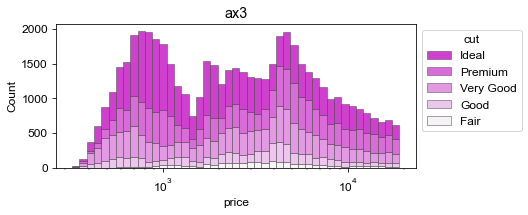

In [11]:
%%time
diamonds = sns.load_dataset("diamonds")
ax3 = pw.Brick("ax3", (5,2))
sns.histplot(diamonds, x="price", hue="cut", multiple="stack",
    palette="light:m_r", edgecolor=".3", linewidth=.5, log_scale=True,
    ax = ax3)
ax3.move_legend(new_loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax3.set_title("ax3")
ax3.savefig("../img/ax3.png", quick=quick)

CPU times: user 343 ms, sys: 129 ms, total: 472 ms
Wall time: 189 ms


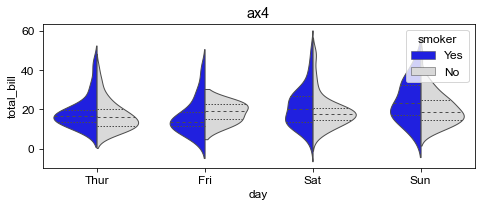

In [12]:
%%time
tips = sns.load_dataset("tips")
ax4 = pw.Brick("ax4", (6,2))
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
    split=True, inner="quart", linewidth=1,
    palette={"Yes": "b", "No": ".85"},
    ax=ax4)
ax4.set_title("ax4")
ax4.savefig("../img/ax4.png", quick=quick)

CPU times: user 422 ms, sys: 251 ms, total: 673 ms
Wall time: 241 ms


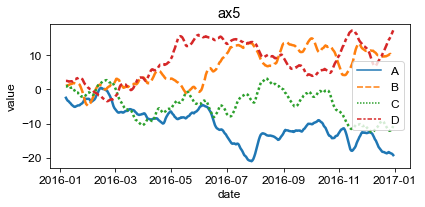

In [13]:
%%time
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()
ax5 = pw.Brick("ax5", (5,2))
sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax5)
ax5.set_xlabel("date")
ax5.set_ylabel("value")
ax5.set_title("ax5")
ax5.savefig("../img/ax5.png", quick=quick)

**Let's align them**

CPU times: user 502 ms, sys: 278 ms, total: 780 ms
Wall time: 291 ms


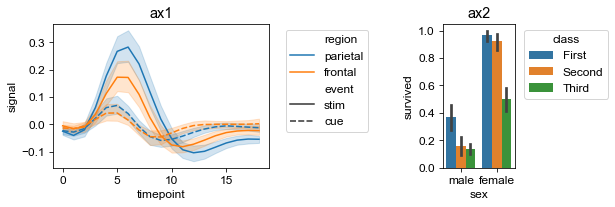

In [14]:
%%time
ax12 = ax1|ax2
ax12.savefig("../img/ax12.png", quick=quick)

CPU times: user 929 ms, sys: 392 ms, total: 1.32 s
Wall time: 711 ms


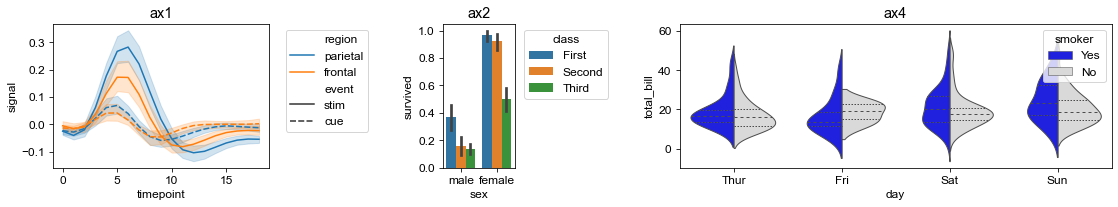

In [15]:
%%time
ax124 = (ax1|ax2)|ax4
ax124.savefig("../img/ax124.png", quick=quick)

CPU times: user 2.31 s, sys: 286 ms, total: 2.6 s
Wall time: 2.03 s


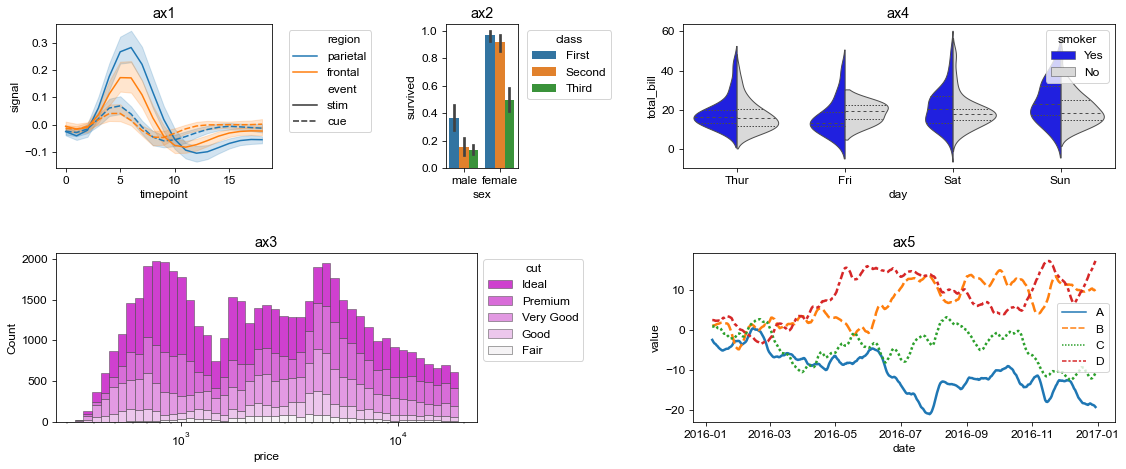

In [16]:
%%time
ax12435 = ax124/(ax3|ax5)
ax12435.savefig("../img/ax12435.png", quick=quick)

CPU times: user 2.28 s, sys: 277 ms, total: 2.55 s
Wall time: 2.08 s


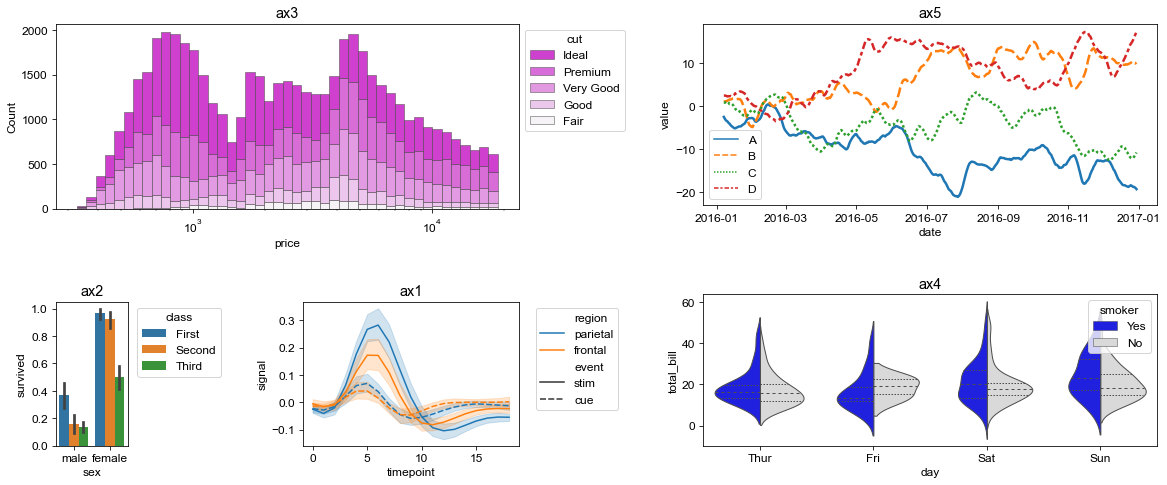

In [17]:
%%time
ax35214 = (ax3/(ax2|ax1))|(ax5/ax4)
ax35214.savefig("../img/ax35214.png", quick=quick)

CPU times: user 2.22 s, sys: 253 ms, total: 2.47 s
Wall time: 2.03 s


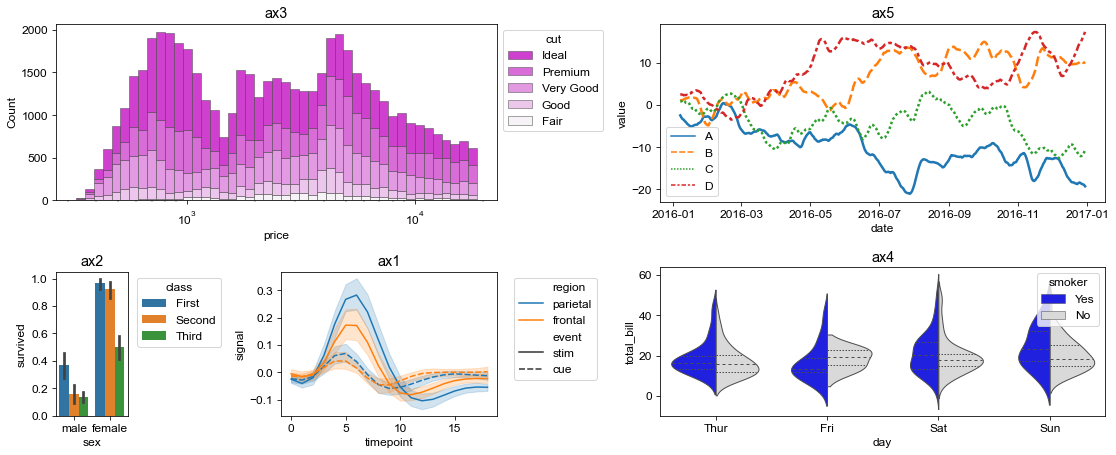

In [18]:
%%time
pw.param["margin"]=0.2 #Default value is 0.5.
ax35214 = (ax3/(ax2|ax1))|(ax5/ax4)
ax35214.savefig("../img/ax35214_v1.1.png", quick=quick)

CPU times: user 2.3 s, sys: 259 ms, total: 2.56 s
Wall time: 2.08 s


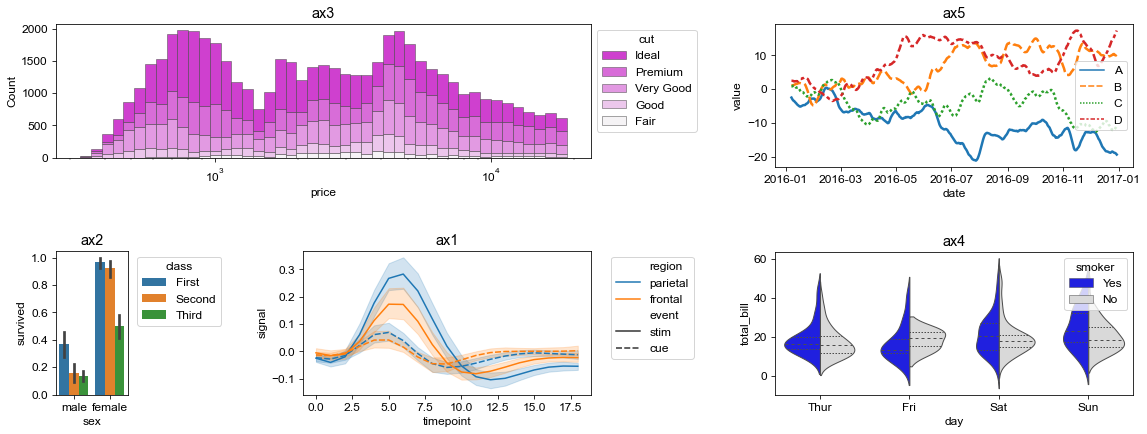

In [19]:
%%time
pw.param["margin"]=0.5
ax1.change_aspectratio((4,2))
ax3.change_aspectratio((4,1))
ax4.change_aspectratio((5,2))
ax35214_v2 = (ax3/(ax2|ax1))|(ax5/ax4)
ax35214_v2.savefig("../img/ax35214_v2.png", quick=quick)

CPU times: user 1.18 s, sys: 201 ms, total: 1.39 s
Wall time: 1.02 s


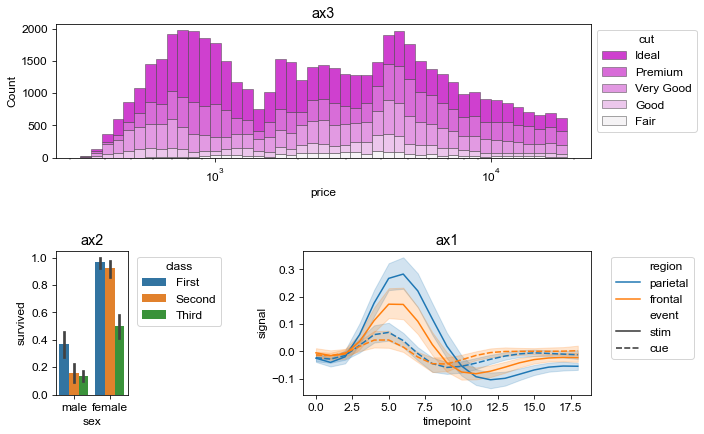

In [20]:
%%time
ax321 = ax3/(ax2|ax1)
ax321.savefig("../img/ax321.png", quick=quick)

CPU times: user 1.21 s, sys: 282 ms, total: 1.49 s
Wall time: 1.14 s


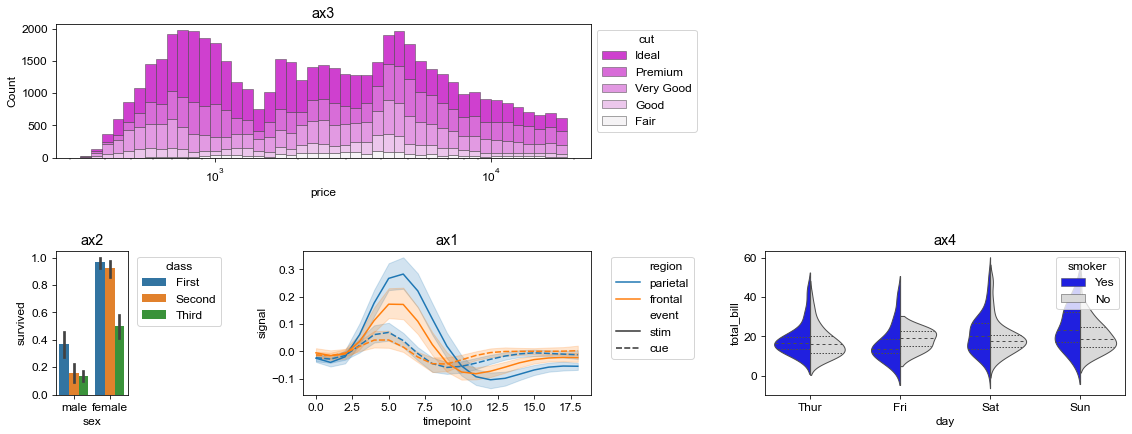

In [21]:
%%time
ax3214 = ax321["ax1"]|ax4
ax3214.savefig("../img/ax3214.png", quick=quick)

CPU times: user 1.48 s, sys: 276 ms, total: 1.75 s
Wall time: 1.26 s


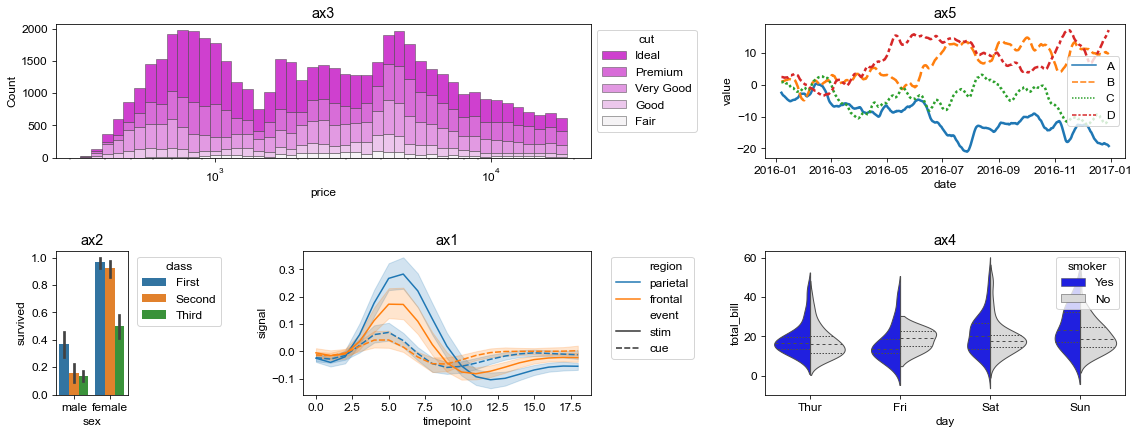

In [22]:
%%time
ax35214_v3 = ax3214["ax3"]|ax5
ax35214_v3.savefig("../img/ax35214_v3.png", quick=quick)

### 3: Arrange multiple plots with their outlines aligned (under inprementation).

CPU times: user 1.09 s, sys: 233 ms, total: 1.32 s
Wall time: 1.22 s


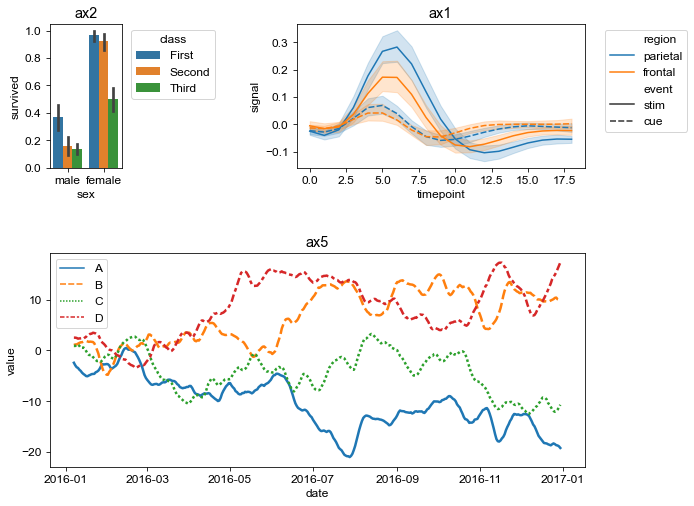

In [23]:
%%time
ax21  = ax2|ax1
ax215 = ax21/ax5
ax215.savefig("../img/ax215.png", quick=quick)

CPU times: user 1.5 s, sys: 331 ms, total: 1.83 s
Wall time: 1.31 s


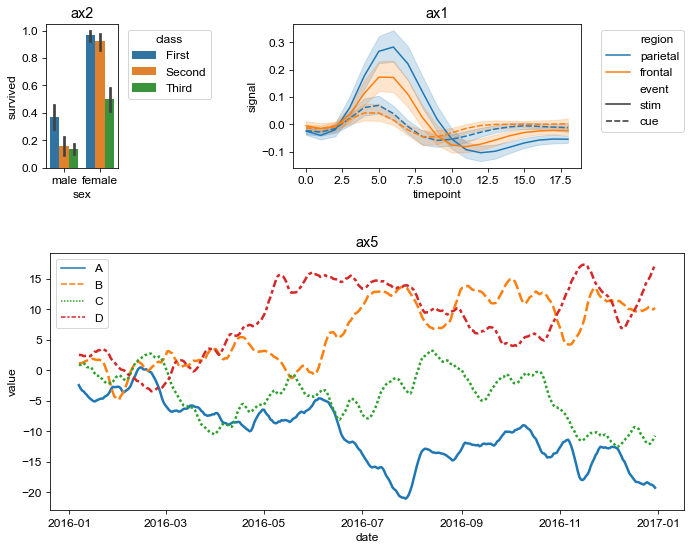

In [24]:
%%time
ax215 = ax21.outline/ax5.outline
ax215.savefig("../img/ax215_v2.png", quick=quick)

In [25]:
pw.clear()

### 4: Advanced usage: Joint plot

CPU times: user 86.9 ms, sys: 46.2 ms, total: 133 ms
Wall time: 56.4 ms


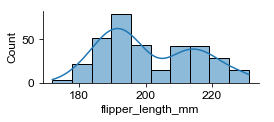

In [26]:
%%time
penguins = sns.load_dataset("penguins")
ax1 = pw.Brick("ax1", figsize=(3,1))
sns.histplot(data=penguins, x="flipper_length_mm", kde=True, ax=ax1)
ax1.spines["top"].set_visible(False) 
ax1.spines["right"].set_visible(False)
ax1.savefig(quick=quick)

CPU times: user 41.2 ms, sys: 2.18 ms, total: 43.4 ms
Wall time: 41.8 ms


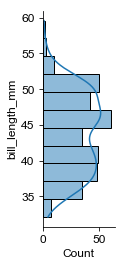

In [27]:
%%time
ax2 = pw.Brick("ax2", figsize=(1,3))
sns.histplot(data=penguins, y="bill_length_mm", kde=True, ax=ax2)
ax2.spines["top"].set_visible(False) 
ax2.spines["right"].set_visible(False)
ax2.savefig(quick=quick)

CPU times: user 37.8 ms, sys: 3.12 ms, total: 40.9 ms
Wall time: 38.7 ms


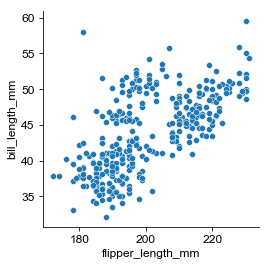

In [28]:
%%time
ax3 = pw.Brick("ax3", figsize=(3,3))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", ax=ax3)
ax3.spines["top"].set_visible(False) 
ax3.spines["right"].set_visible(False)
ax3.savefig(quick=quick)

In [29]:
ax1.set_xlim(ax3.get_xlim())
ax1.set_xticks([])
ax1.set_xlabel("") 

ax2.set_ylim(ax3.get_ylim())
ax2.set_yticks([])
ax2.set_ylabel("")

Text(17.246874999999996, 0.5, '')

CPU times: user 68.8 ms, sys: 1.41 ms, total: 70.2 ms
Wall time: 69.3 ms


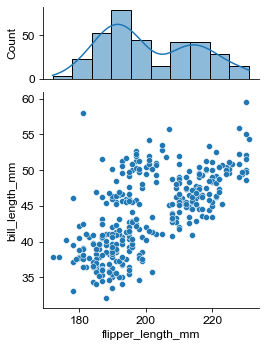

In [30]:
%%time
pw.param["margin"] = 0.1 #default value is 0.4
ax13 = ax1 / ax3
ax13.savefig(quick=quick)

CPU times: user 91.5 ms, sys: 1.94 ms, total: 93.5 ms
Wall time: 92 ms


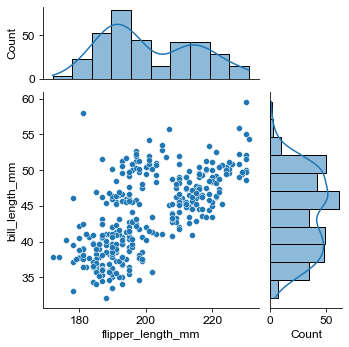

In [31]:
%%time
ax132 = ax13["ax3"] | ax2
ax132.savefig(quick=quick)

Off course, you can align multiple joint plots

CPU times: user 339 ms, sys: 28.2 ms, total: 367 ms
Wall time: 373 ms


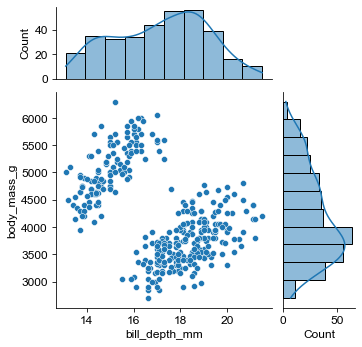

In [32]:
%%time
ax4 = pw.Brick("ax4", figsize=(3,1))
sns.histplot(data=penguins, x="bill_depth_mm", kde=True, ax=ax4)
ax4.spines["top"].set_visible(False) 
ax4.spines["right"].set_visible(False)

ax5 = pw.Brick("ax5", figsize=(1,3))
sns.histplot(data=penguins, y="body_mass_g", kde=True, ax=ax5)
ax5.spines["top"].set_visible(False) 
ax5.spines["right"].set_visible(False)
ax5.savefig()

ax6 = pw.Brick("ax6", figsize=(3,3))
sns.scatterplot(data=penguins, x="bill_depth_mm", y="body_mass_g", ax=ax6)
ax6.spines["top"].set_visible(False) 
ax6.spines["right"].set_visible(False)
ax6.savefig()

ax4.set_xlim(ax4.get_xlim())
ax4.set_xticks([])
ax4.set_xlabel("") 

ax5.set_ylim(ax5.get_ylim())
ax5.set_yticks([])
ax5.set_ylabel("")

ax46 = ax4 / ax6
ax465 = ax46["ax6"] | ax5
ax465.savefig(quick=quick)

CPU times: user 324 ms, sys: 2.53 ms, total: 326 ms
Wall time: 325 ms


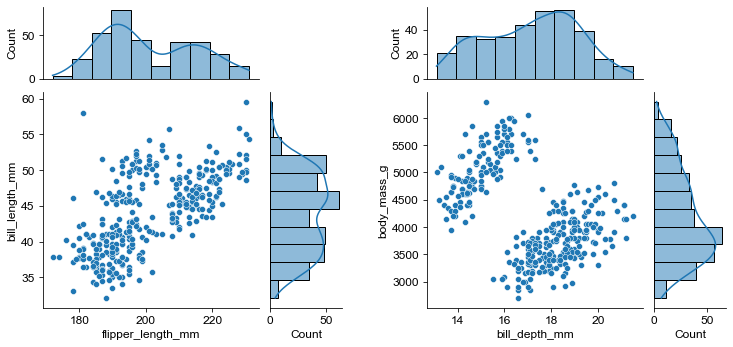

In [33]:
%%time
pw.param["margin"] = 0.5
ax132465 = ax132 | ax465
ax132465.savefig(quick=quick)

In [34]:
pw.clear()

### 5: Heatmap with colorbar
When creating heatmap pltos using patchworklib, I recommand to create heatmap and color bar objects separately, as follows.

In [35]:
import matplotlib as mpl
data1 = 20 * np.random.rand(100,100) - 10
data2 = 20 * np.random.rand(100,100) - 10

cmap = mpl.cm.Reds
norm = mpl.colors.Normalize(vmin=-10, vmax=10)
ax1 = pw.Brick("axx", figsize=(3,3))
ax2 = pw.Brick("axy", figsize=(3,3))
ax1.imshow(data1, interpolation='nearest', cmap=cmap, aspect="auto")
ax2.imshow(data2, interpolation='nearest', cmap=cmap, aspect="auto")

CPU times: user 330 ms, sys: 6.42 ms, total: 336 ms
Wall time: 347 ms


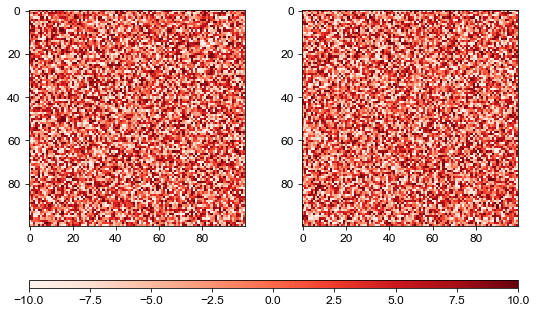

In [36]:
%%time
ax_cb1 = pw.Brick("ax_cb1", figsize=(6, 0.1))
cb1 = mpl.colorbar.ColorbarBase(ax_cb1, cmap=cmap, norm=norm, orientation='horizontal')
heatmap1 = (ax1|ax2)
heatmap1 = heatmap1/ax_cb1
heatmap1.savefig(quick=quick)

CPU times: user 786 ms, sys: 6.38 ms, total: 793 ms
Wall time: 791 ms


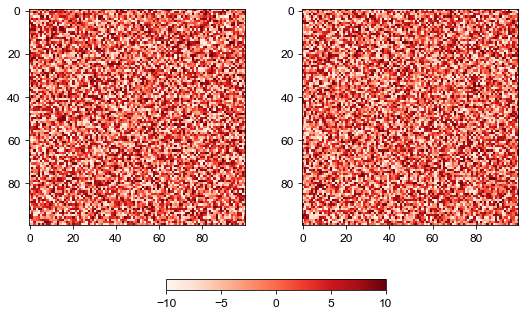

In [37]:
%%time
ax_cb1_2 = pw.Brick("ax_cb1_2", figsize=(2, 0.1))
cb1 = mpl.colorbar.ColorbarBase(ax_cb1_2, cmap=cmap, norm=norm, orientation='horizontal')
heatmap1 = ax1|ax2
heatmap1 = heatmap1/(pw.spacer(ax_cb1_2,0.5)|ax_cb1_2|pw.spacer(ax_cb1_2,0.5))
heatmap1.savefig(quick=quick)

CPU times: user 662 ms, sys: 195 ms, total: 857 ms
Wall time: 471 ms


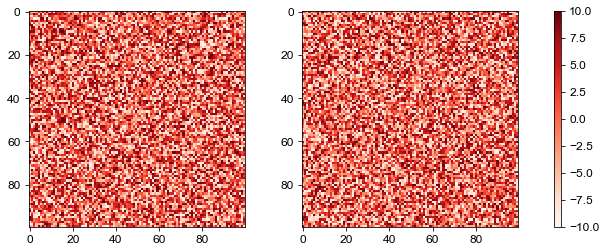

In [38]:
%%time
ax_cb    = pw.Brick("ax_cb", figsize=(0.1,3))
cb       = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm)
ax12     = ax1|ax2
heatmap2 = ax12|ax_cb
heatmap2.savefig("../img/heatmap-1.png")

CPU times: user 973 ms, sys: 120 ms, total: 1.09 s
Wall time: 1.01 s


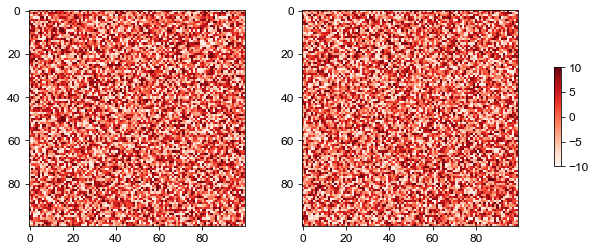

In [39]:
%%time
ax_cb2   = pw.Brick("ax_cb2", figsize=(0.1,1.5))
cb2      = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cmap, norm=norm)
heatmap2 = ax12 | (pw.spacer(ax_cb2,0.5)/ax_cb2/pw.spacer(ax_cb2,0.5))
heatmap2.savefig(quick=quick)

CPU times: user 608 ms, sys: 5.05 ms, total: 613 ms
Wall time: 612 ms


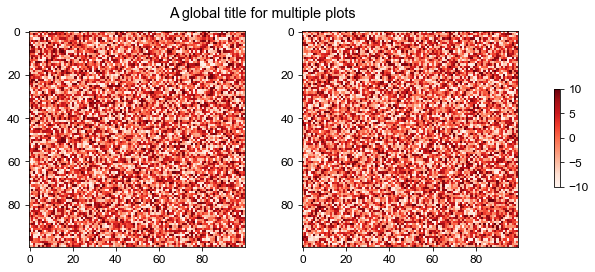

In [40]:
%%time
ax12.case.set_title("A global title for multiple plots", pad=10)
heatmap2 = ax12|(pw.spacer(ax_cb2,0.5)/ax_cb2/pw.spacer(ax_cb2,0.5))
heatmap2.savefig(quick=quick)

In [41]:
print(time.time()-t0)

28.648927927017212
